## 1. Import requirements

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

## 2. Get weather data from api
### Data Source: https://archive-api.open-meteo.com

In [194]:
response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=44.6464&longitude=-63.5729&start_date=2013-01-01&end_date=2023-12-14&daily=temperature_2m_max,rain_sum,windspeed_10m_max&timezone=auto")
fetched_data = json.loads(response.text)


## 3. Load the data into a Pandas Dataframe

In [195]:
df = pd.DataFrame(fetched_data['daily'])

## 4. Print the first few rows of the fetched data

In [196]:
df.head()

,time,temperature_2m_max,rain_sum,windspeed_10m_max
0,2013-01-01,0.5,0.0,21.7
1,2013-01-02,-7.5,0.0,30.3
2,2013-01-03,-7.4,0.0,22.7
3,2013-01-04,-0.1,0.0,16.9
4,2013-01-05,0.6,0.0,29.8


## 5. Print some information about the Dataframe

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                4000 non-null   object 
 1   temperature_2m_max  3999 non-null   float64
 2   rain_sum            3998 non-null   float64
 3   windspeed_10m_max   3999 non-null   float64
dtypes: float64(3), object(1)
memory usage: 125.1+ KB


## 6. Extract the year portion out of the data in Dataframe

In [198]:


# Convert the time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Extract the year only and create a new column called year
df['year'] = df['time'].dt.year

# Display the DataFrame with the extracted year
print(df)


           time  temperature_2m_max  rain_sum  windspeed_10m_max  year
0    2013-01-01                 0.5       0.0               21.7  2013
1    2013-01-02                -7.5       0.0               30.3  2013
2    2013-01-03                -7.4       0.0               22.7  2013
3    2013-01-04                -0.1       0.0               16.9  2013
4    2013-01-05                 0.6       0.0               29.8  2013
...         ...                 ...       ...                ...   ...
3995 2023-12-10                 8.5       1.3               17.5  2023
3996 2023-12-11                14.8      17.1               48.2  2023
3997 2023-12-12                 5.8       0.0               21.3  2023
3998 2023-12-13                 6.1       NaN               19.8  2023
3999 2023-12-14                 NaN       NaN                NaN  2023

[4000 rows x 5 columns]


## 7. Plot some intersting charts

<Axes: title={'center': '10 Year Average Temperature for Halifax'}, xlabel='year', ylabel='Temperature(°C)'>

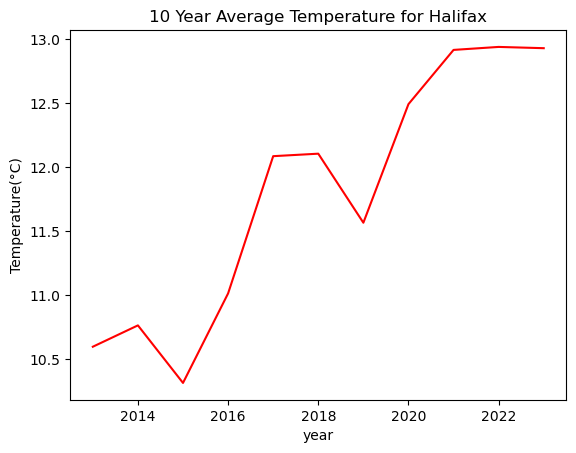

In [199]:
# Plot for average temperature in halifax over the past 10 years
plt.title("10 Year Average Temperature for Halifax")
plt.xticks(rotation='vertical')
plt.ylabel("Temperature(°C)")
plt.xlabel("Year")
df.groupby(['year'])['temperature_2m_max'].mean().plot.line(color='red',label='Maximum Temperature')



<Axes: title={'center': '10 Years Average Precipitation for Halifax'}, xlabel='year', ylabel='Precipitation Volume'>

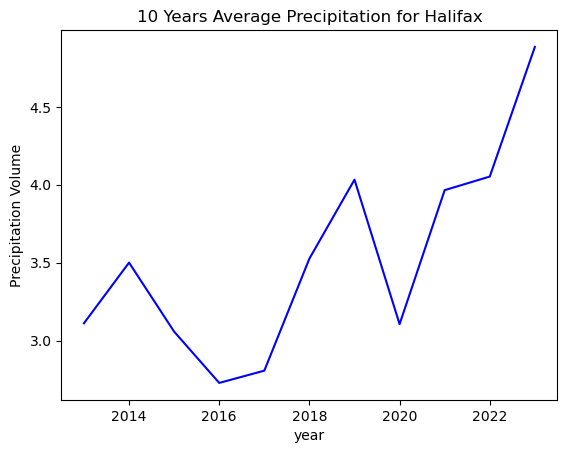

In [200]:
# Plot for average precipitation in Halifax for the past 10 years
plt.title("10 Years Average Precipitation for Halifax")
plt.xticks(rotation='vertical')
plt.ylabel("Precipitation Volume")
plt.xlabel("Year")
df.groupby(['year'])['rain_sum'].mean().plot.line(color='blue')